In [4]:
import numpy as np
import pandas as pd
import random
import string

In [5]:
DNA_BASES = ["A", "C", "G", "T"]

def generate_guide(length = 20):
    return"".join(random.choice(DNA_BASES) for _ in range(length))

num_samples = 1000
guides = [generate_guide() for _ in range(num_samples)]

guides[:5]

['CGTCATCACGAAGTAATGAA',
 'GAGCTGTACGTAGACGAAAG',
 'AAGAACCGTGACTTAAGAAC',
 'TCTTAAGATACTTATACACC',
 'GGAACGTTAGCCGCCTGTCG']

In [6]:
# simulate efficiency scores
efficiency = np.round(np.random.uniform(0.05, 0.95, num_samples), 3)

efficiency[:10]

array([0.133, 0.705, 0.94 , 0.545, 0.432, 0.535, 0.096, 0.529, 0.639,
       0.149])

In [7]:
df = pd.DataFrame({
    "guide_sequence": guides, "efficiency": efficiency
})

df.head()

,guide_sequence,efficiency
0,CGTCATCACGAAGTAATGAA,0.133
1,GAGCTGTACGTAGACGAAAG,0.705
2,AAGAACCGTGACTTAAGAAC,0.940
3,TCTTAAGATACTTATACACC,0.545
4,GGAACGTTAGCCGCCTGTCG,0.432


In [8]:
df.to_csv("../data/crispr_guides_day1.csv", index = False)

In [9]:
df = pd.read_csv("../data/crispr_guides_day1.csv")

df.head()

,guide_sequence,efficiency
0,CGTCATCACGAAGTAATGAA,0.133
1,GAGCTGTACGTAGACGAAAG,0.705
2,AAGAACCGTGACTTAAGAAC,0.940
3,TCTTAAGATACTTATACACC,0.545
4,GGAACGTTAGCCGCCTGTCG,0.432


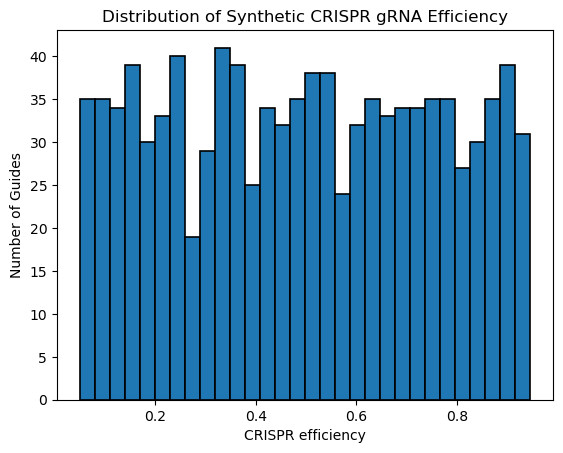

In [11]:
import matplotlib.pyplot as plt
import os

os.makedirs("../outputs", exist_ok = True)

plt.figure()
plt.hist(
    df["efficiency"], bins=30, edgecolor = "black", linewidth = 1.2
)
plt.xlabel("CRISPR efficiency")
plt.ylabel("Number of Guides")
plt.title("Distribution of Synthetic CRISPR gRNA Efficiency")
plt.savefig("../outputs/crispr_efficiency_distribution_01.png", dpi= 300)
plt.show()